# Modules

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# Loading dataset

In [54]:
winequalityN_dataa_path =r"winequalityN.csv"

In [55]:
df=pd.read_csv(winequalityN_dataa_path)
print("Shape of df",df)

Shape of df        type  fixed acidity  volatile acidity  citric acid  residual sugar   
0     white            7.0             0.270         0.36            20.7  \
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  den

In [56]:
df["quality"]

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [57]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [58]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [59]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# statistical information

In [60]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# datatype

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Preproccessing dataset

In [62]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [63]:
for col,value in df.items():
    if col!='type':
        df[col] = df[col].fillna(df[col].mean())

In [64]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
col

'quality'

In [66]:
df[col].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6497 entries, 0 to 6496
Series name: quality
Non-Null Count  Dtype
--------------  -----
6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [67]:
df[col].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [68]:
df['type']=df['type'].replace('red',1).replace('white',0)

In [69]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [70]:
df[col].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

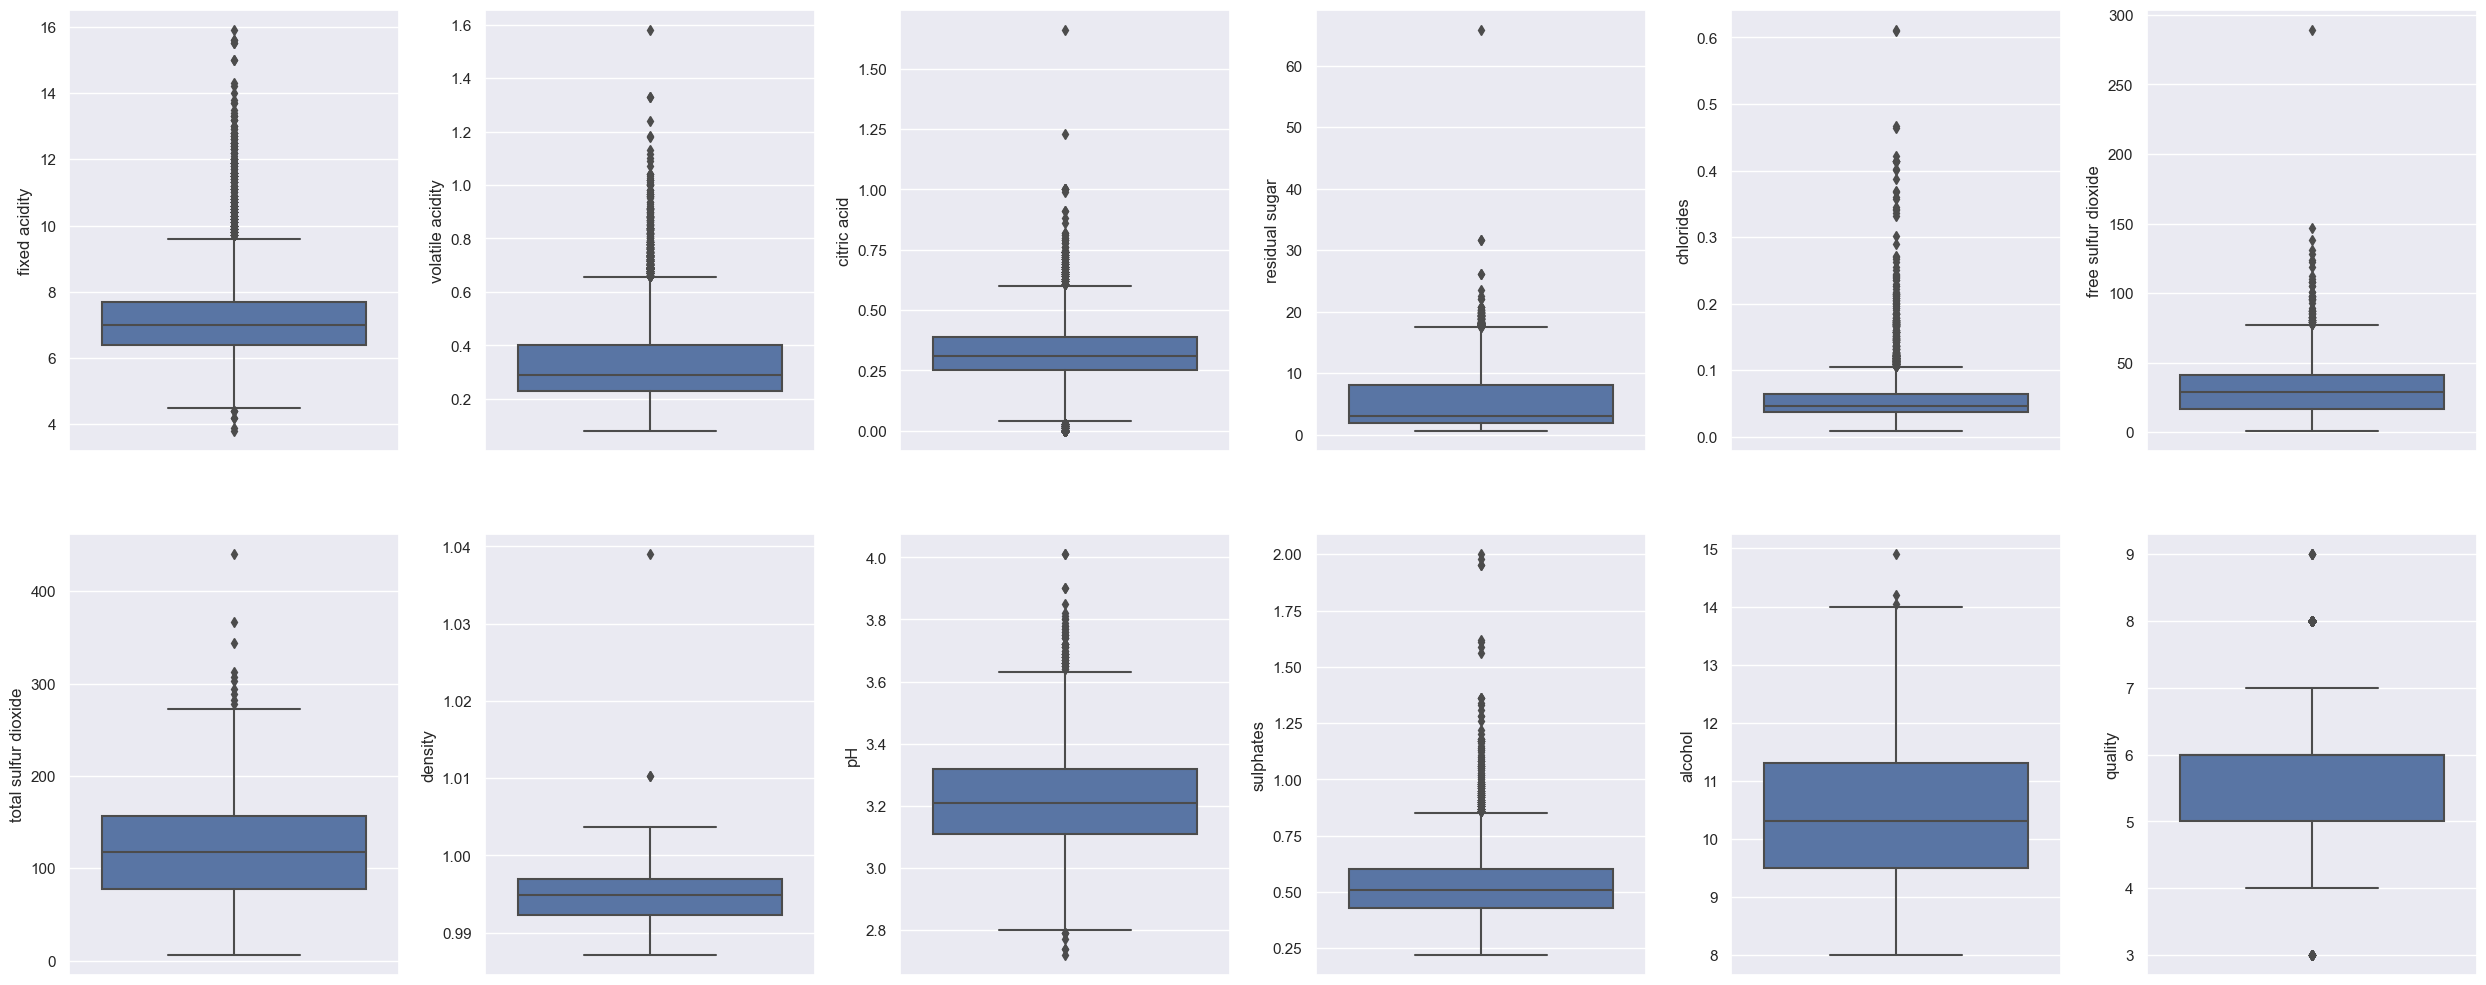

In [71]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(25,10))
index =0
ax=ax.flatten()
for col,value in df.items():
    if col !='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=1,w_pad=1.3,h_pad=5.0)

# Distribution plot

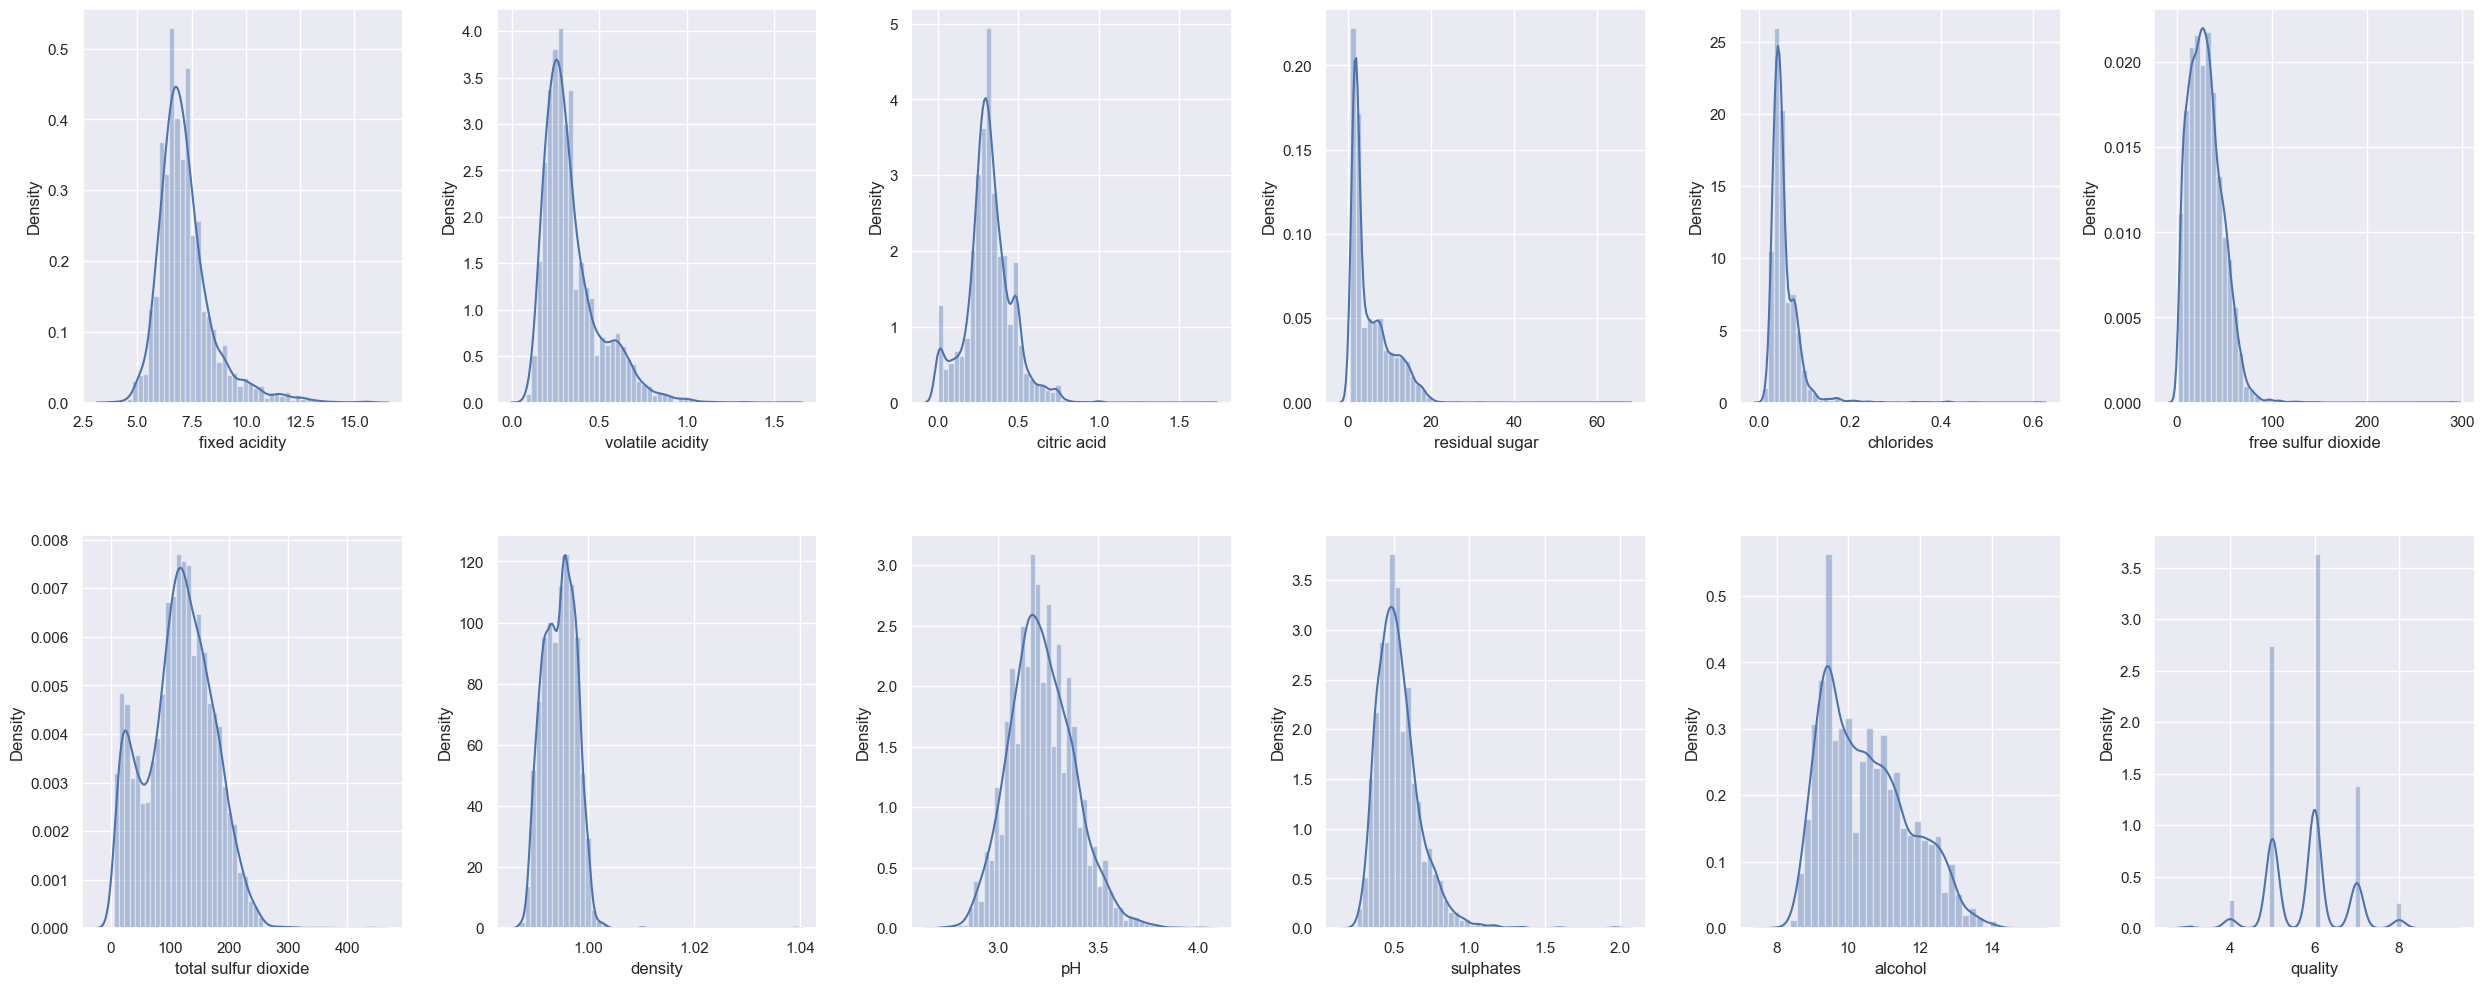

In [72]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(25,10))
index =0
ax=ax.flatten()
for col,value in df.items():
    if col !='type':
        sns.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=1,w_pad=1.3,h_pad=5.0)

# Log transformation

In [73]:
df['free sulfur dioxide'] = np.log(1+ df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

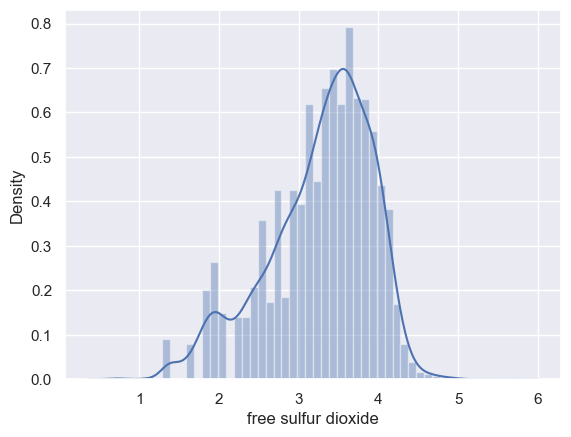

In [74]:
sns.distplot(df['free sulfur dioxide'])

<Axes: ylabel='count'>

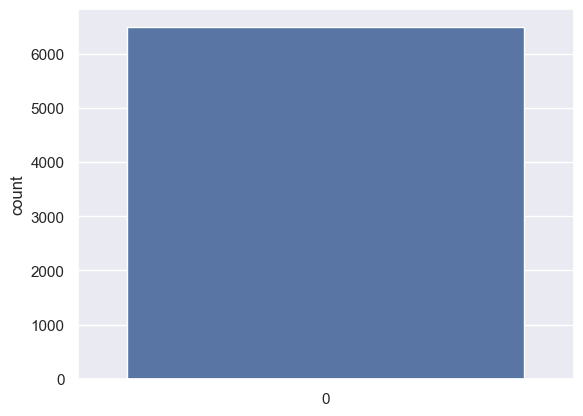

In [75]:
sns.countplot(df['quality'])

<Axes: >

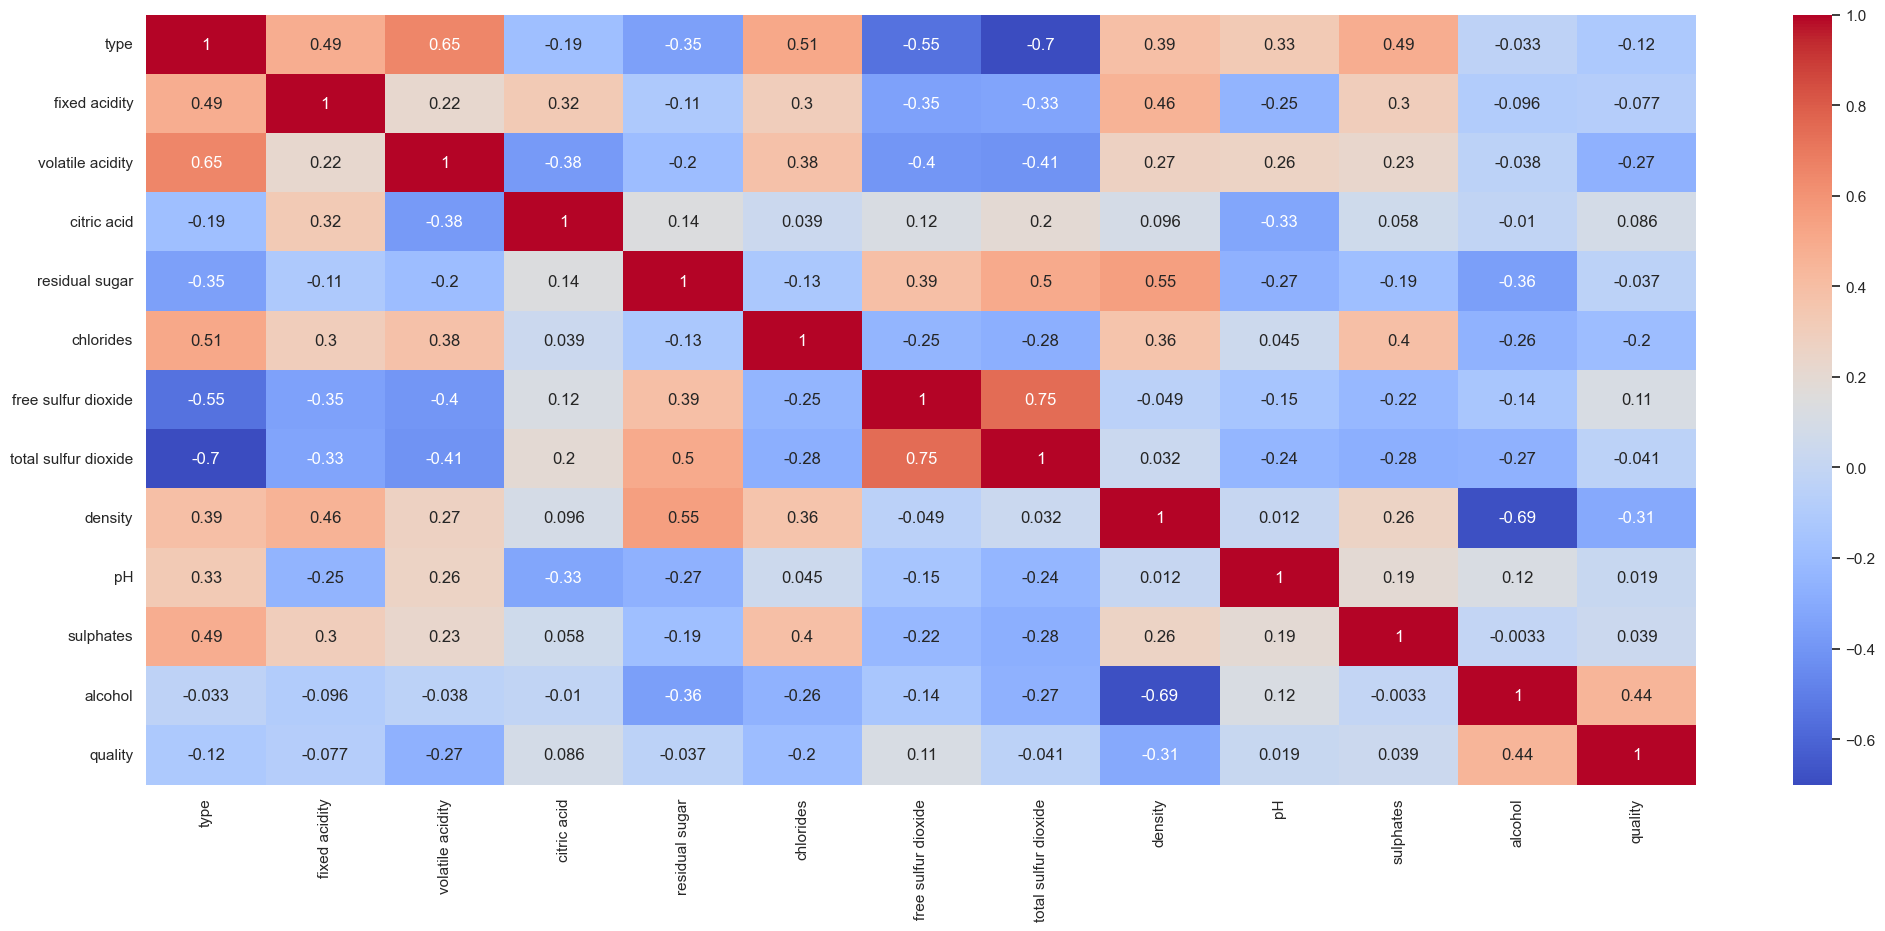

In [76]:
import numpy as np; np.random.seed(0)
import seaborn as sns
sns.set()
corr=df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Split

In [77]:
X= df.drop(columns=['type','quality'])
y=df['quality']

# Class Imbalancement

In [78]:
y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X,y=oversample.fit_resample(X,y)

In [80]:
y.value_counts()

quality
6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64

# Model Training

# classification of sample

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm
from sklearn.model_selection import cross_val_score,train_test_split


In [82]:
def classify(model,X,y):
    x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=47)
    model.fit(x_train,y_train)
    print("Accuracy",model.score(x_test,y_test)*100)
    score =cross_val_score(model,X,y,cv=5)
    print("CV score",np.mean(score)*100)

In [83]:
model1=LogisticRegression()
print("Accuracy & CV score of LogisticRegression :-")
classify(model1,X,y)


Accuracy & CV score of LogisticRegression :-
Accuracy 33.87064275639734
CV score 32.062083607413186


In [84]:
model2 =DecisionTreeClassifier()
print("Accuracy & CV score of DecisionTreeClassifier :-")
classify(model2,X,y)

Accuracy & CV score of DecisionTreeClassifier :-
Accuracy 80.21358049566794
CV score 75.22677700482149


In [85]:
model3 =RandomForestClassifier(criterion="entropy")
print("Accuracy & CV score of RandomForestClassifier :-")
classify(model3,X,y)

Accuracy & CV score of RandomForestClassifier :-
Accuracy 88.21277453153334
CV score 82.686942550113


In [86]:
model5=lightgbm.LGBMClassifier(force_col_wise=True)
print("Accuracy & CV score of LGBMClassifier :-")
classify(model5,X,y)

Accuracy & CV score of LGBMClassifier :-
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 14889, number of used features: 11
[LightGBM] [Info] Start training from score -1.937017
[LightGBM] [Info] Start training from score -1.962502
[LightGBM] [Info] Start training from score -1.943093
[LightGBM] [Info] Start training from score -1.950623
[LightGBM] [Info] Start training from score -1.944970
[LightGBM] [Info] Start training from score -1.937949
[LightGBM] [Info] Start training from score -1.945440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy 87.18517025992342
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 15881, number of used features: 11
[LightGBM] [Info] Start training from score -1.946225
[LightGBM] 

# Saving Best model

In [87]:
import pickle
from pickle import dump,load
filename = 'finalized_model.h5'
pickle.dump(model3, open(filename, 'wb'))

In [88]:
with open("finalized_model.h5",'rb') as model:
    model = load(model)

In [89]:
X_new = np.array([[8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1]])
prediction = model.predict(X_new)[0]

In [90]:
print(f"Predicted Wine Quality: {prediction}")

Predicted Wine Quality: 6
